In [2]:
import pandas as pd
sales = pd.read_csv('c:/data/project/team/15~19편의점매출.csv', encoding='ANSI')
cols=['상권_코드_명', '당월_매출_금액']
sales = sales[cols]
sales.rename(columns= {'상권_코드_명' : '도로명', '당월_매출_금액' : '월매출평균'}, inplace = True)
sales = sales.groupby(by=['도로명']).mean().reset_index()

Roadname = pd.read_csv('c:/data/project/team/도로명코드.txt',sep='|',encoding='ms949')
Roadname = Roadname[['도로명', '구']].drop_duplicates().set_index('도로명') #중복 제거
Roadname.head()

#매출량과 도로명 Inner조인
sales = pd.merge(sales, Roadname, how='inner', on='도로명') 
sales = sales.groupby(['구']).mean() #구별 평균계산
sales.head()

,월매출평균
구,
가평군,4.814701e+08
강남구,7.630092e+08
강동구,5.374981e+08
강릉시,1.212113e+09
강북구,3.961955e+08


In [5]:
openclose = pd.read_csv('c:/data/project/team/15~19편의점개폐업.csv', encoding='ANSI')
openclose.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2015,1,A,골목상권,1000001,계동길,CS300002,편의점,1,9,22,2,22,2,8
1,2015,1,A,골목상권,1000002,난계로27길,CS300002,편의점,8,35,6,2,6,2,27
2,2015,1,A,골목상권,1000003,돈화문로11가길,CS300002,편의점,1,29,14,4,3,1,28
3,2015,1,A,골목상권,1000004,명륜길,CS300002,편의점,2,10,10,1,0,0,8
4,2015,1,A,골목상권,1000005,백석동길,CS300002,편의점,2,4,25,1,0,0,2


In [6]:
openclose.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수',
       '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수'],
      dtype='object')

In [7]:
cols=['상권_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수']
colnames=['도로명', '점포 수', '유사 업종 점포 수', '개업 율', '개업 점포 수', '폐업률', '폐업 점포 수']
openclose = openclose[cols]
for i in range(len(cols)) :
    openclose.rename(columns= {cols[i]:colnames[i]}, inplace = True)
openclose = openclose.groupby(by=['도로명']).mean()
openclose.head()

,점포 수,유사 업종 점포 수,개업 율,개업 점포 수,폐업률,폐업 점포 수
도로명,,,,,,
가로공원로58길,0.05,5.40,0.85,0.05,0.00,0.00
가로공원로76가길,3.15,17.05,4.30,0.75,2.50,0.45
가로공원로80길,3.10,12.55,4.30,0.55,2.35,0.30
가마산로61길,0.00,9.25,5.30,0.50,3.40,0.30
가산로3길,4.50,33.00,5.75,1.95,3.70,1.25


In [8]:
openclose.to_csv('c:/data/project/team/openclose.csv', encoding='ANSI')

In [10]:
Roadname = pd.read_csv('c:/data/project/team/도로명코드.txt',sep='|',encoding='ms949')
Roadname = Roadname[['도로명', '구']].drop_duplicates().set_index('도로명') #중복 제거
Roadname.head()

,구
도로명,
세종대로,종로구
삼일대로,종로구
필운대로,종로구
통일로,종로구
동호로,종로구


In [11]:
openclose = pd.merge(openclose, Roadname, how='inner', on='도로명') #가구정보와 월매출평균 Inner조인
openclose = openclose.groupby(by=['구']).mean()
openclose.head()

,점포 수,유사 업종 점포 수,개업 율,개업 점포 수,폐업률,폐업 점포 수
구,,,,,,
가평군,1.450000,10.850000,5.000000,0.550000,2.650000,0.300000
강남구,5.598148,27.298148,3.889815,1.076852,3.946296,1.032407
강동구,4.728409,23.065909,4.346591,0.993182,3.514773,0.852273
강릉시,8.050000,28.700000,5.300000,1.500000,4.550000,1.250000
강북구,4.062162,19.163514,4.686486,0.837838,3.813514,0.732432


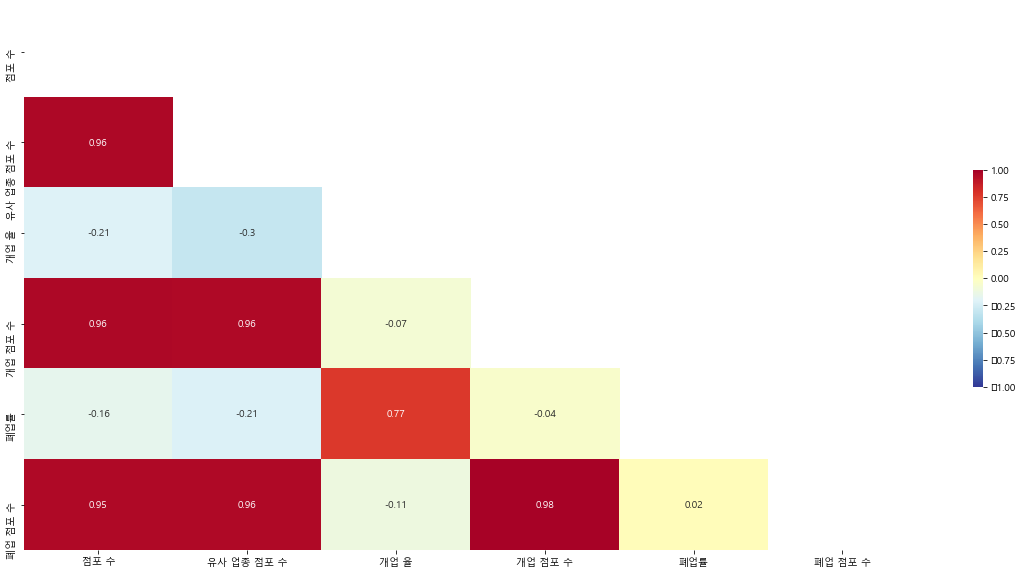

In [24]:

# 다중공선성 확인
# 유사업종 점포수 개업, 점포수, 점포수는 다중공선성이 높다는 것을 확인 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
plt.figure(figsize=(20,10)) #그래프의 사이즈
mask = np.zeros_like(openclose.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(openclose.corr(), annot=True, mask=mask, cbar_kws={'shrink':.4}, cmap='RdYlBu_r', vmin =-1, vmax=1)
plt.show()

In [14]:
data = pd.merge(openclose, sales, how='inner', on='구') #가구정보와 월매출평균 Inner조인
data.head()

,점포 수,유사 업종 점포 수,개업 율,개업 점포 수,폐업률,폐업 점포 수,월매출평균
점포 수,1.000000,0.964052,-0.209902,0.962090,-0.159746,0.953235,0.189946
유사 업종 점포 수,0.964052,1.000000,-0.298460,0.959841,-0.212976,0.958443,0.267909
개업 율,-0.209902,-0.298460,1.000000,-0.070385,0.771361,-0.113661,-0.468805
개업 점포 수,0.962090,0.959841,-0.070385,1.000000,-0.040100,0.984802,0.120623
폐업률,-0.159746,-0.212976,0.771361,-0.040100,1.000000,0.020263,-0.352077
폐업 점포 수,0.953235,0.958443,-0.113661,0.984802,0.020263,1.000000,0.145143
월매출평균,0.189946,0.267909,-0.468805,0.120623,-0.352077,0.145143,1.000000


In [27]:
# 점포수외 다중공선성이 높은 점포 수, 점포 수 삭제
data.drop(['유사 업종 점포 수','개업 점포 수'],axis=1)


,점포 수,개업 율,폐업률,폐업 점포 수,월매출평균
구,,,,,
가평군,1.450000,5.000000,2.650000,0.300000,4.814701e+08
강남구,5.598148,3.889815,3.946296,1.032407,7.630092e+08
강동구,4.728409,4.346591,3.514773,0.852273,5.374981e+08
강릉시,8.050000,5.300000,4.550000,1.250000,1.212113e+09
강북구,4.062162,4.686486,3.813514,0.732432,3.961955e+08
...,...,...,...,...,...
홍성군,8.050000,5.300000,4.550000,1.250000,1.212113e+09
홍천군,19.850000,4.800000,3.750000,2.600000,3.619622e+08
화성시,7.825000,4.150000,3.575000,1.100000,1.524226e+09
